In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Loading Dataset
df = pd.read_csv("XAUUSD_Hourly_Cleaned.csv")

In [2]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Prepare features for clustering
# Select relevant features for clustering
features = ['Close', 'Returns', 'Volatility', 'High_Low_Range', 'TickVolume', 'RSI']

In [9]:
# Check for missing values
print("Missing Values Before Processing:")
df.isnull()

Missing Values Before Processing:


,Open,High,Low,Close,TickVolume,Spread,datetime,Target_Close
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
293,False,False,False,False,False,False,False,False
294,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          298 non-null    float64       
 1   High          298 non-null    float64       
 2   Low           298 non-null    float64       
 3   Close         298 non-null    float64       
 4   TickVolume    298 non-null    int64         
 5   Spread        298 non-null    int64         
 6   datetime      298 non-null    datetime64[ns]
 7   Target_Close  298 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 18.8 KB


In [11]:
df.head(50)

,Open,High,Low,Close,TickVolume,Spread,datetime,Target_Close
0,3289.25,3290.21,3271.43,3274.02,5132,7,2025-05-01 01:00:00,3272.69
1,3274.28,3285.10,3269.83,3272.69,4855,7,2025-05-01 02:00:00,3246.51
2,3273.13,3276.33,3241.21,3246.51,8490,7,2025-05-01 03:00:00,3238.92
3,3246.51,3251.34,3234.38,3238.92,6694,7,2025-05-01 04:00:00,3241.58
4,3238.95,3251.74,3235.17,3241.58,5156,7,2025-05-01 05:00:00,3229.51
5,3241.51,3242.56,3228.94,3229.51,6438,7,2025-05-01 06:00:00,3226.63
6,3229.57,3231.98,3221.32,3226.63,5705,7,2025-05-01 07:00:00,3236.64
7,3226.63,3238.83,3223.44,3236.64,6486,7,2025-05-01 08:00:00,3235.75
8,3236.67,3243.19,3233.87,3235.75,7645,5,2025-05-01 09:00:00,3230.12
9,3235.78,3236.96,3226.09,3230.12,6947,5,2025-05-01 10:00:00,3235.24


In [18]:
#Prepare features for clustering
# Verify available columns
print("Available Columns:", df.columns.tolist())

Available Columns: ['Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread', 'datetime', 'Target_Close']


In [21]:
# Select relevant features for clustering
features = ['Close', 'Returns', 'Volatility', 'High_Low_Range', 'TickVolume', 'RSI']
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Warning: Missing features {missing_features}. Attempting to generate them...")

In [24]:
# Generate missing features if possible
if 'Returns' not in df.columns:
    df['Returns'] = df['Close'].pct_change() * 100
if 'Volatility' not in df.columns:
    df['Volatility'] = df['Returns'].rolling(window=24, min_periods=1).std()
if 'High_Low_Range' not in df.columns:
    df['High_Low_Range'] = df['High'] - df['Low']
if 'RSI' not in df.columns:
    def calculate_rsi(data, periods=14):
        delta = data.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))
    df['RSI'] = calculate_rsi(df['Close'])

In [25]:
# Update missing_features after generation
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    raise ValueError(f"Missing features: {missing_features}. Please run the Advanced EDA code or ensure required columns (High, Low) are present.")

In [26]:
# Handle missing values
print("Missing Values Before Processing:")
print(df[features].isnull().sum())
df[features] = df[features].fillna(method='ffill').fillna(df[features].mean())

Missing Values Before Processing:
Close              0
Returns            1
Volatility         2
High_Low_Range     0
TickVolume         0
RSI               13
dtype: int64


C:\Users\touhi\AppData\Local\Temp\ipykernel_47444\3576792743.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].fillna(method='ffill').fillna(df[features].mean())


In [27]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

In [28]:
# Determine optimal number of clusters
print("\n=== Elbow Method for Optimal K ===")
wcss = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(scaled_df, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)


=== Elbow Method for Optimal K ===


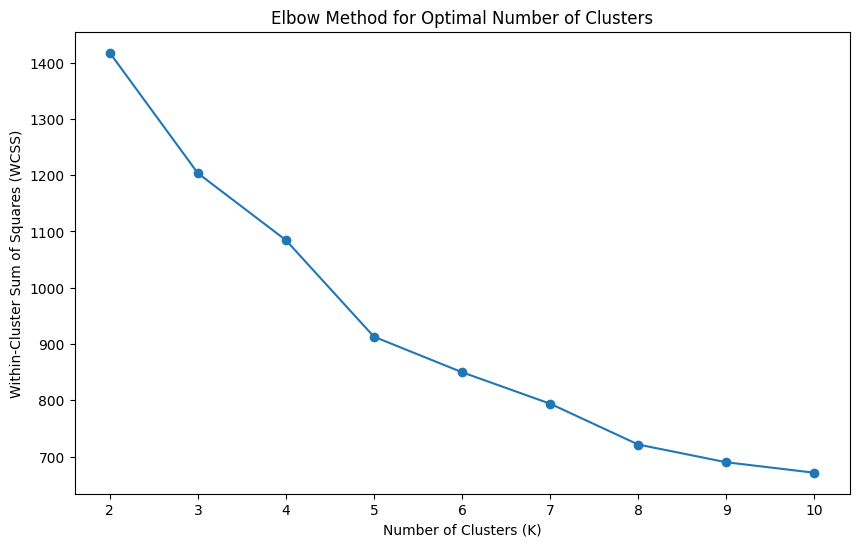

In [29]:
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.savefig('elbow_curve.png')
plt.show()

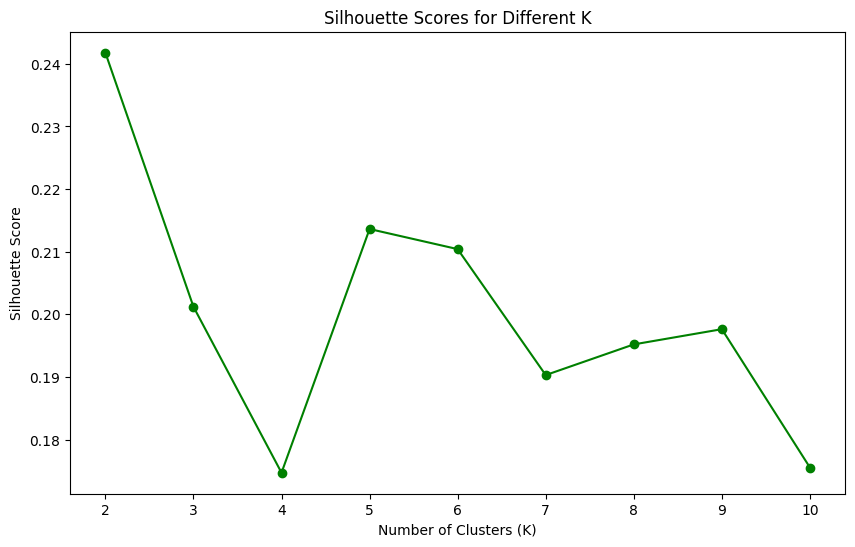

In [30]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.savefig('silhouette_scores.png')
plt.show()

In [31]:
# Apply K-means with chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)


=== Cluster Analysis ===


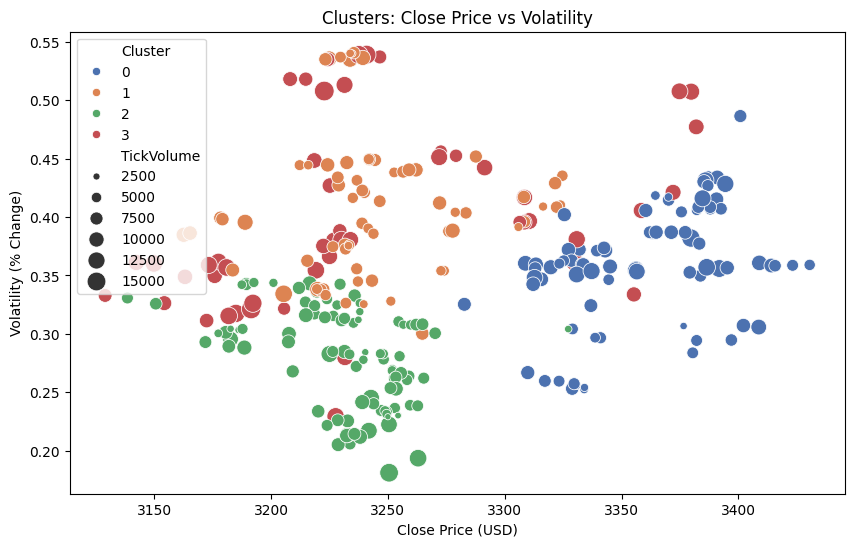

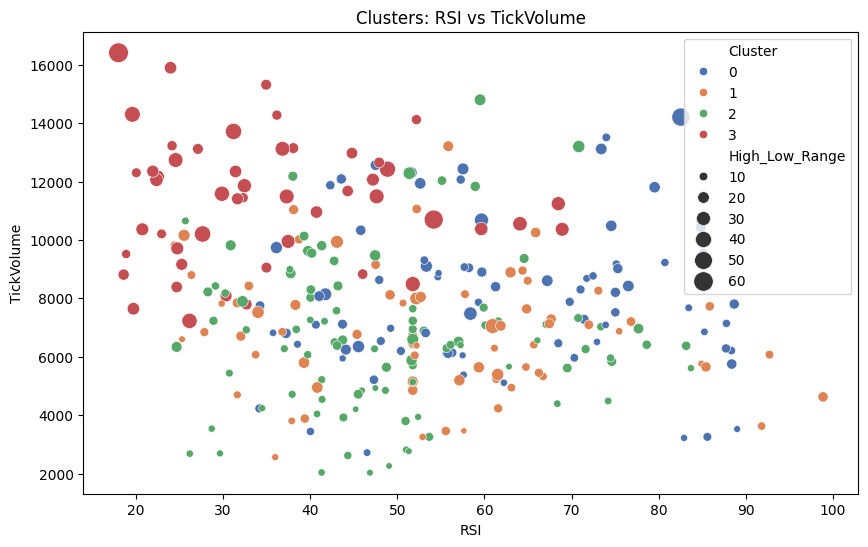

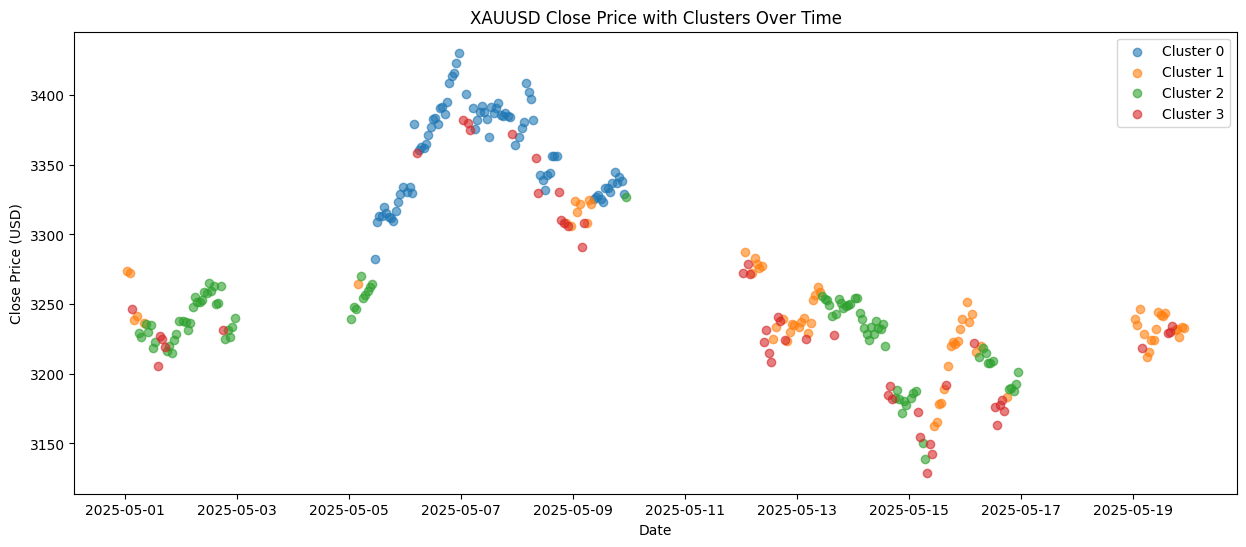


Cluster Mean Statistics:
               Close   Returns  Volatility  High_Low_Range    TickVolume  \
Cluster                                                                    
0        3360.659398  0.093753    0.359899       13.331084   8110.192771   
1        3243.581111  0.140989    0.410428       13.129861   6832.125000   
2        3230.642151 -0.000699    0.279320       10.818387   6669.924731   
3        3242.447800 -0.378761    0.401716       26.022600  11387.200000   

               RSI  
Cluster             
0        62.664794  
1        54.229749  
2        49.207213  
3        34.972500  


In [34]:
# Visualize and interpret clusters
print("\n=== Cluster Analysis ===")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Close'], y=df['Volatility'], hue=df['Cluster'], palette='deep', size=df['TickVolume'], sizes=(20, 200))
plt.title('Clusters: Close Price vs Volatility')
plt.xlabel('Close Price (USD)')
plt.ylabel('Volatility (% Change)')
plt.savefig('cluster_close_volatility.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RSI'], y=df['TickVolume'], hue=df['Cluster'], palette='deep', size=df['High_Low_Range'], sizes=(20, 200))
plt.title('Clusters: RSI vs TickVolume')
plt.xlabel('RSI')
plt.ylabel('TickVolume')
plt.savefig('cluster_rsi_tickvolume.png')
plt.show()

plt.figure(figsize=(15, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['datetime'], cluster_data['Close'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('XAUUSD Close Price with Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('cluster_timeseries.png')
plt.show()

cluster_stats = df.groupby('Cluster')[features].mean()
print("\nCluster Mean Statistics:")
print(cluster_stats)

In [35]:
# Calculate cluster sizes
cluster_counts = df['Cluster'].value_counts()

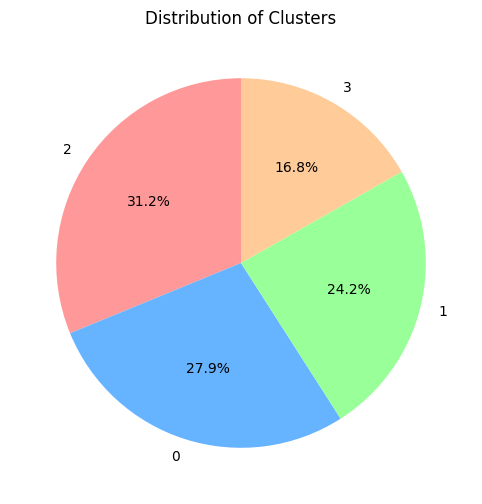

In [36]:
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Clusters')
plt.savefig('cluster_distribution_pie.png')
plt.show()

In [37]:
# Print cluster sizes
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
Cluster
2    93
0    83
1    72
3    50
Name: count, dtype: int64


In [38]:
# Select features for comparison
features = ['Close', 'Volatility', 'RSI', 'TickVolume', 'High_Low_Range']

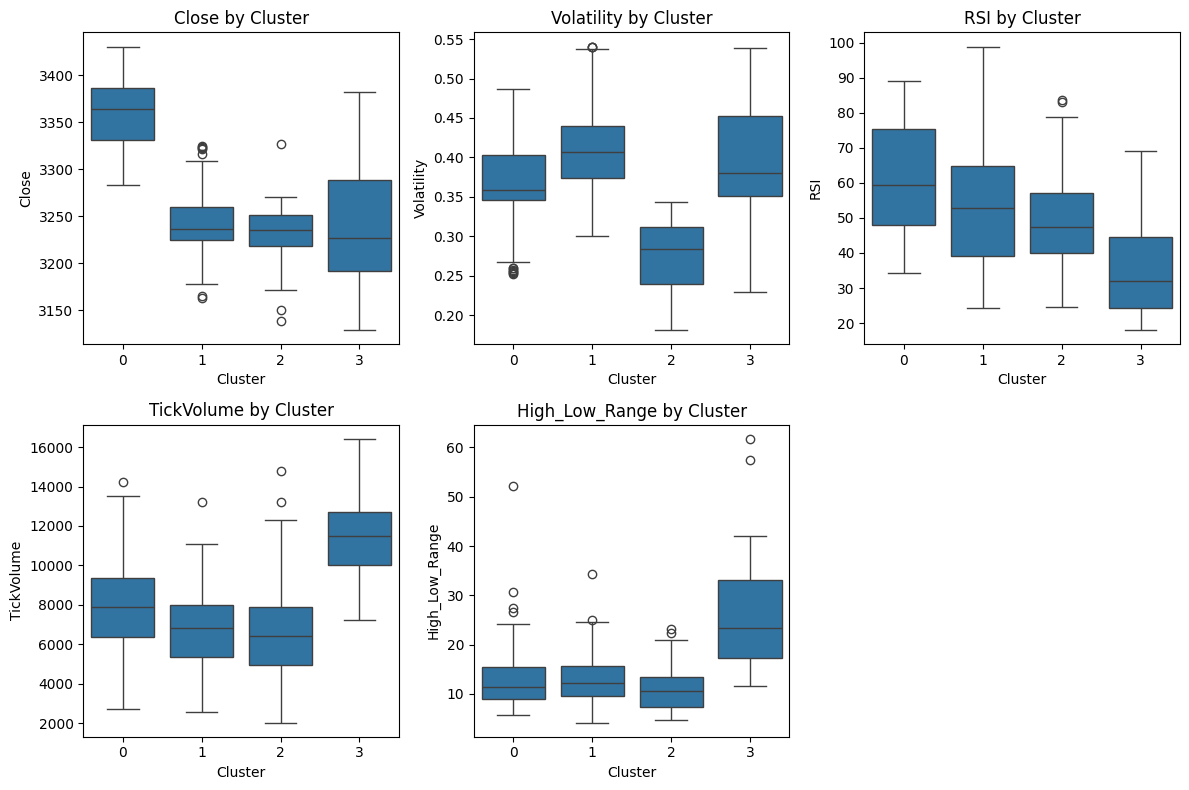

In [39]:
# Plot boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.savefig('cluster_boxplots.png')
plt.show()

In [40]:
# Print mean and std for each feature by cluster
print("\nFeature Statistics by Cluster:")
print(df.groupby('Cluster')[features].agg(['mean', 'std']))


Feature Statistics by Cluster:
               Close            Volatility                  RSI             \
                mean        std       mean       std       mean        std   
Cluster                                                                      
0        3360.659398  32.794745   0.359899  0.051210  62.664794  16.666987   
1        3243.581111  35.955337   0.410428  0.059074  54.229749  17.360267   
2        3230.642151  29.116815   0.279320  0.042542  49.207213  14.123472   
3        3242.447800  67.638547   0.401716  0.076736  34.972500  13.550540   

           TickVolume              High_Low_Range             
                 mean          std           mean        std  
Cluster                                                       
0         8110.192771  2484.706733      13.331084   6.967653  
1         6832.125000  2061.520066      13.129861   5.347790  
2         6669.924731  2545.691062      10.818387   4.250750  
3        11387.200000  2150.410412      26.

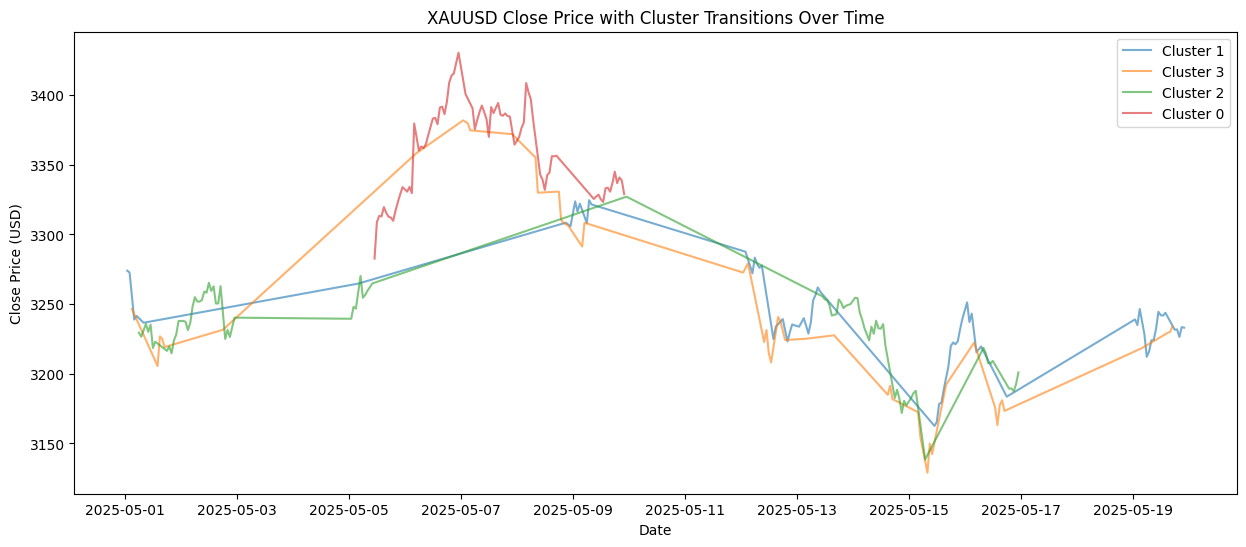

In [41]:
# Plot Close price with cluster transitions
plt.figure(figsize=(15, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.plot(cluster_data['datetime'], cluster_data['Close'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('XAUUSD Close Price with Cluster Transitions Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('cluster_transitions_timeseries.png')
plt.show()

In [42]:
# Print transition points (where clusters change)
transitions = df.index[df['Cluster'] != df['Cluster'].shift()].tolist()
print("\nCluster Transition Points (Indices):")
print(transitions)


Cluster Transition Points (Indices):
[0, 2, 3, 5, 7, 8, 13, 17, 40, 41, 49, 50, 56, 73, 74, 92, 93, 94, 96, 113, 114, 122, 124, 132, 135, 136, 137, 141, 143, 146, 160, 161, 162, 163, 165, 170, 174, 176, 178, 179, 180, 187, 188, 194, 199, 200, 221, 224, 233, 235, 237, 240, 245, 246, 256, 257, 258, 259, 260, 265, 270, 271, 276, 279, 280, 290, 293]


In [43]:
# Select features for correlation
features = ['Close', 'Returns', 'Volatility', 'High_Low_Range', 'TickVolume', 'RSI']


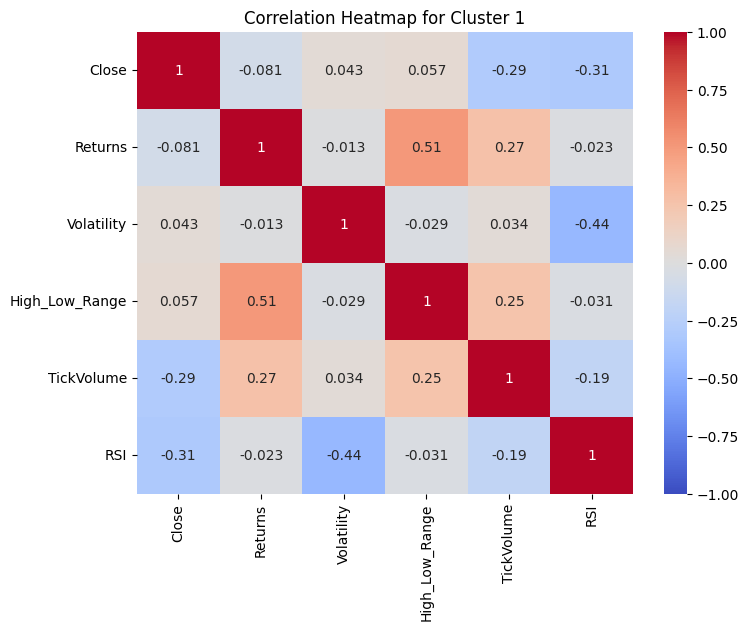

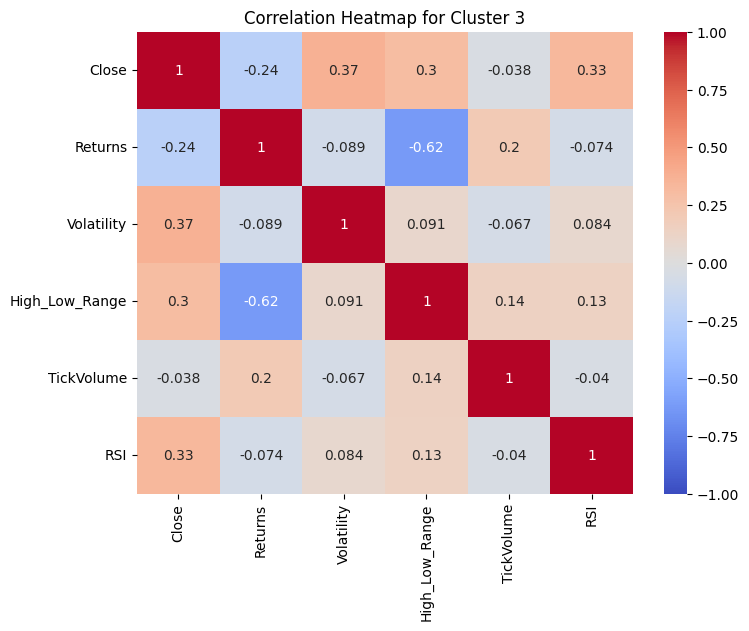

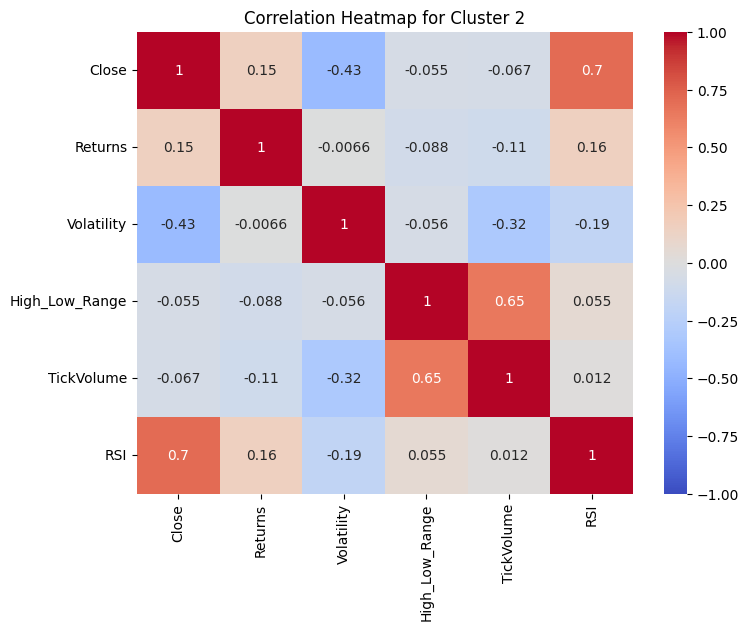

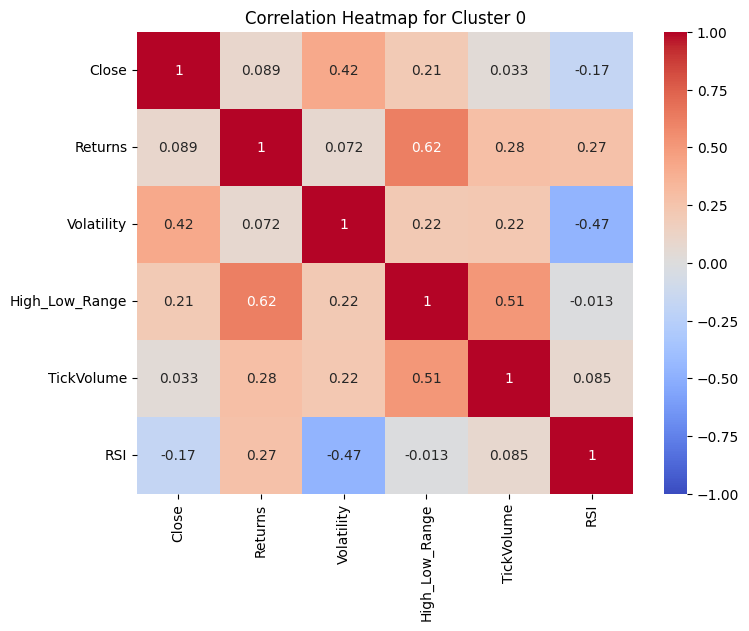

In [44]:
# Plot correlation heatmap for each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster][features]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cluster_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.savefig(f'cluster_{cluster}_correlation_heatmap.png')
    plt.show()


In [45]:
# Print overall correlation
print("\nOverall Correlation Across All Clusters:")
print(df[features].corr())


Overall Correlation Across All Clusters:
                   Close   Returns  Volatility  High_Low_Range  TickVolume  \
Close           1.000000  0.089155    0.160742        0.036010    0.021701   
Returns         0.089155  1.000000   -0.047082       -0.295778   -0.137209   
Volatility      0.160742 -0.047082    1.000000        0.283160    0.173629   
High_Low_Range  0.036010 -0.295778    0.283160        1.000000    0.583593   
TickVolume      0.021701 -0.137209    0.173629        0.583593    1.000000   
RSI             0.354001  0.281320   -0.189037       -0.201088   -0.184766   

                     RSI  
Close           0.354001  
Returns         0.281320  
Volatility     -0.189037  
High_Low_Range -0.201088  
TickVolume     -0.184766  
RSI             1.000000  


In [46]:
# Select features for summary
features = ['Close', 'Returns', 'Volatility', 'High_Low_Range', 'TickVolume', 'RSI']



In [47]:
# Generate cluster profile
cluster_profile = df.groupby('Cluster')[features].agg(['mean', 'median', 'min', 'max'])
print("\nCluster Profile Summary:")
print(cluster_profile)


Cluster Profile Summary:
               Close                               Returns            \
                mean    median      min      max      mean    median   
Cluster                                                                
0        3360.659398  3364.440  3282.70  3430.46  0.093753  0.059836   
1        3243.581111  3236.815  3162.60  3324.64  0.140989  0.094271   
2        3230.642151  3235.670  3138.53  3327.15 -0.000699 -0.006806   
3        3242.447800  3227.260  3128.99  3381.92 -0.378761 -0.386230   

                            Volatility            ... High_Low_Range         \
              min       max       mean    median  ...            min    max   
Cluster                                           ...                         
0       -0.443283  1.501050   0.359899  0.359023  ...           5.75  52.09   
1       -0.505183  1.188066   0.410428  0.406240  ...           4.21  34.28   
2       -0.517118  0.468457   0.279320  0.284275  ...           4.76  23.2

In [48]:
#Save results
df.to_csv('XAUUSD_Hourly_Clustered.csv', index=False)
print("\nDataset with cluster labels saved to 'XAUUSD_Hourly_Clustered.csv'")


Dataset with cluster labels saved to 'XAUUSD_Hourly_Clustered.csv'
